In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [2]:
df=pd.read_csv("suicide_rates_overview_1985_to_2016.csv")

In [3]:
print (('The data has the following shape'), df.shape)
print ("\n")
df.info()

The data has the following shape (27820, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.drop('HDI for year', axis=1, inplace = True)

In [6]:
df.drop('country-year', axis=1, inplace = True)

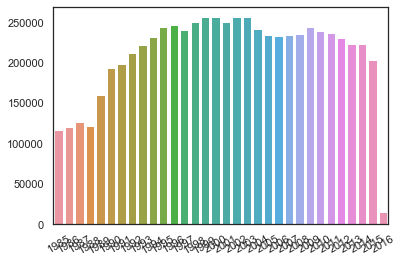

In [7]:
# Check what year had the highest number of suicides
suicides_year = []

for y in df['year'].unique():
    suicides_year.append(sum(df[df['year'] == y]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['year'].unique(), y = suicides_year)

In [8]:
# Can't distinguish by bar-chart
suicides_year = []

for y in df['year'].unique():
    suicides_year.append(sum(df[df['year'] == y]['suicides_no']))
    
suicides_year = pd.DataFrame(suicides_year, columns=['suicides_no'])
suicides_year['year'] = df['year'].unique()
suicides_year.head()

,suicides_no,year
0,126842,1987
1,121026,1988
2,160244,1989
3,211473,1992
4,221565,1993


In [9]:
# 1987 has the highset number of suicided, so I will focus on this year
df = df[df.year == 1987]
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


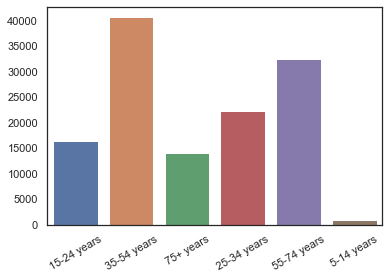

In [13]:
# New I will focus on the age category

suicides_no_age = []

for a in df['age'].unique():
    suicides_no_age.append(sum(df[df['age'] == a]['suicides_no']))

plt.xticks(rotation=30)
sns.barplot(x = df['age'].unique(), y = suicides_no_age)

- The vast majprity of suicides is in the 35 - 54 age category
- This research will now focus on that age category

In [15]:
df = df[df.age == '35-54 years']
df.head()
 

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
290,Antigua and Barbuda,1987,female,35-54 years,0,6059,0.00,"337,174,852",5595,Silent
296,Antigua and Barbuda,1987,male,35-54 years,0,5927,0.00,"337,174,852",5595,Silent
614,Argentina,1987,male,35-54 years,482,3409100,14.14,"111,106,191,358",4026,Silent


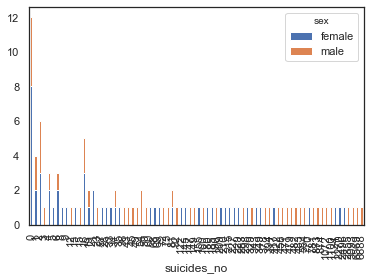

In [20]:

df.groupby(['suicides_no','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

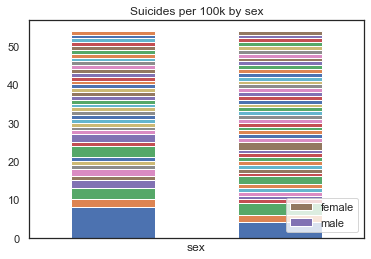

In [31]:

df.groupby(['sex','suicides_no']).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Suicides per 100k by sex')

# other it'll show up as 'dummy' 
plt.xlabel('sex')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['sex'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

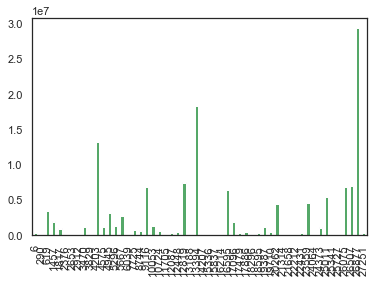

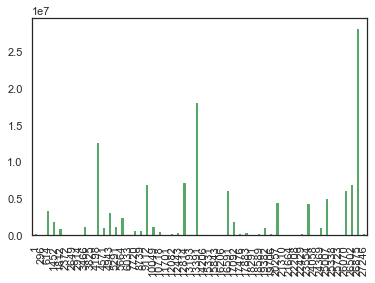

In [36]:
# scatterplot
df.groupby(['sex']).plot(kind='bar',stacked=True,legend=False)

plt.show()

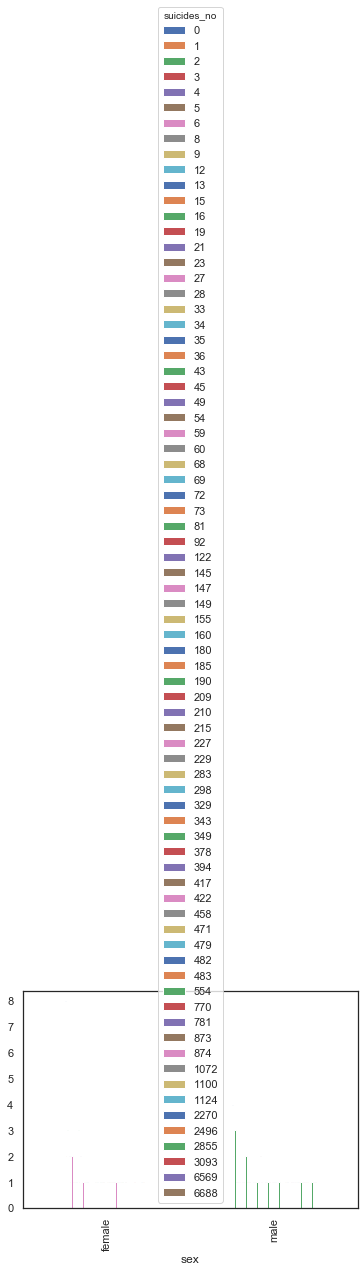

In [38]:
df.groupby(['sex','suicides_no']).size().unstack().plot(kind='bar',stacked=False)
plt.show()

In [43]:
df.suicides_no = df[['country', 'suicides_no']]
df = df.suicides_no.groupby('country').sum()
df.head()

AttributeError: Cannot access callable attribute 'groupby' of 'DataFrameGroupBy' objects, try using the 'apply' method

ValueError: Item wrong length 1 instead of 108.

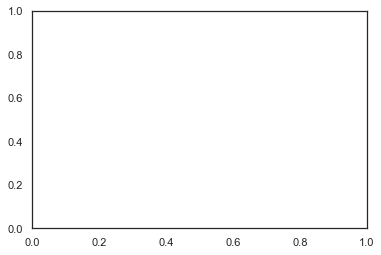

In [39]:
ax = plt.gca()

df.plot(kind='line', x='suicides_no', y=[df.sex=='male'], ax=ax)
df.plot(kind='line', x='suicides_no', y=[df.sex=='female'], color='red', ax=ax)

plt.show()

In [ ]:
# Create a df that combines all of the values for countries

suicides_country = []

for a in df['country'].unique():
    suicides_country.append(sum(df[df['country'] == a]['suicides/100k pop']))
suicides_country = pd.DataFrame(suicides_country, columns=['suicides/100k pop'])
suicides_country
#plt.xticks(rotation=30)
#sns.barplot(x = df['counrty'].unique(), y = suicides/100k pop)

- This research will now focus on the 35 to 54 age category
- The first will be a check to see if there is a difference between the sexse.


In [ ]:
#df.plot(x='col_name_1', y='col_name_2', style='o')

df_male = df[df.sex == 'male']
df_male
#print (df.sex == 'male')
#df_female = df[df.sex == 'female']
#df_female

#dfs=pd.DataFrame()
#df['Male']= suicides_male
#df['Female']= suicides_female

#fig, ax =plt.subplots(1,2)
#sns.countplot(df['df_male'], ax=ax[0])
#sns.countplot(df['df_female'], ax=ax[1])
#fig.show()

#for a in df:
  #  if df['sex'] == 'male':
 #   suicides_no_age.append(sum(df_f[df_f['age'] == a]['suicides_no']))

#plt.xticks(rotation=30)
#sns.barplot(x = df_f['age'].unique(), y = suicides_no_age_f)

# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn
# https://github.com/HarryBitten/Suicide-Rates-Analysis/blob/master/SuiStatsCW.ipynb

# https://stackoverflow.com/questions/43131274/how-do-i-plot-two-countplot-graphs-side-by-side-in-seaborn

In [ ]:
criteria_1 = df['age'] == '35-54 years'
criteria_2 = df['sex'] == 'male'

criteria_all = criteria_1 | criteria_2
dfm = df[criteria_all]

In [ ]:
dfm.head()

In [ ]:
df.groupby('country')